In [1]:
import SimpleITK as sitk
import matplotlib.pylab as plt
import numpy as np
import nibabel as nib
from skimage.transform import resize

In [52]:
def draw(images, columns=4):
    rows = int(np.ceil(images.shape[0] / columns))
    max_size = 20
    
    width = max(columns * 5, max_size)
    height = width * rows // columns

    plt.figure(figsize=(width, height))
    plt.gray()
    plt.subplots_adjust(0,0,1,1,0.01,0.01)
    for i in range(images.shape[0]):
        plt.subplot(rows,columns,i+1), plt.imshow(images[i]), plt.axis('off')
        # use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
    plt.show()

In [56]:
def draw_masked(images, masks, columns=4):
    assert images.shape == masks.shape
    
    rows = int(np.ceil(images.shape[0] / columns))
    max_size = 20
    
    width = min(columns * 5, max_size)
    height = width * rows // columns

    fig = plt.figure(figsize=(width, height))
    plt.gray()
    plt.subplots_adjust(0,0,1,1,0.01,0.01)
    
    X, Y = np.meshgrid(np.arange(masks.shape[1]), np.arange(masks.shape[2]))
    
    for i in range(images.shape[0]):
        ax = fig.add_subplot(rows,columns,i+1)
        if masks[i].sum() > 0:
            ax.contour(X, Y, masks[i], 1, colors='red', linewidths=0.5)
        ax.imshow(images[i], origin='lower', cmap='gray')
        plt.axis('off')
    
    plt.show()

In [4]:
def read_mhd(file):
    return sitk.GetArrayFromImage(sitk.ReadImage(file, sitk.sitkFloat32))

In [5]:
def read_nii(file):
    return np.asarray(nib.load(file).dataobj).transpose(2, 1, 0)

In [6]:
vessel12_21 = read_mhd("VESSEL12_21.mhd")

In [7]:
vessel12_21.shape

(459, 512, 512)

In [8]:
vessel12_21_mask = read_mhd("VESSEL12_21_mask.mhd")

In [9]:
vessel12_21_mask.shape

(459, 512, 512)

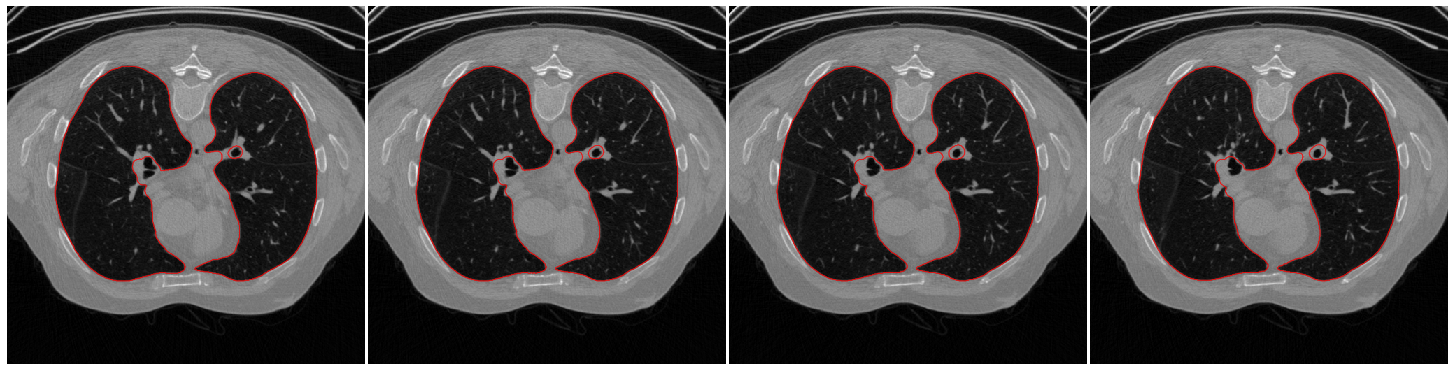

In [10]:
draw_masked(vessel12_21[230:234], vessel12_21_mask[230:234])

In [11]:
lola11_50 = read_mhd("lola11-50.mhd")
lola11_50.shape

(257, 512, 512)

In [48]:
lola11_50_mask = read_nii("lola1150_mask_improved.nii")
lola11_50_mask.shape

(257, 512, 512)

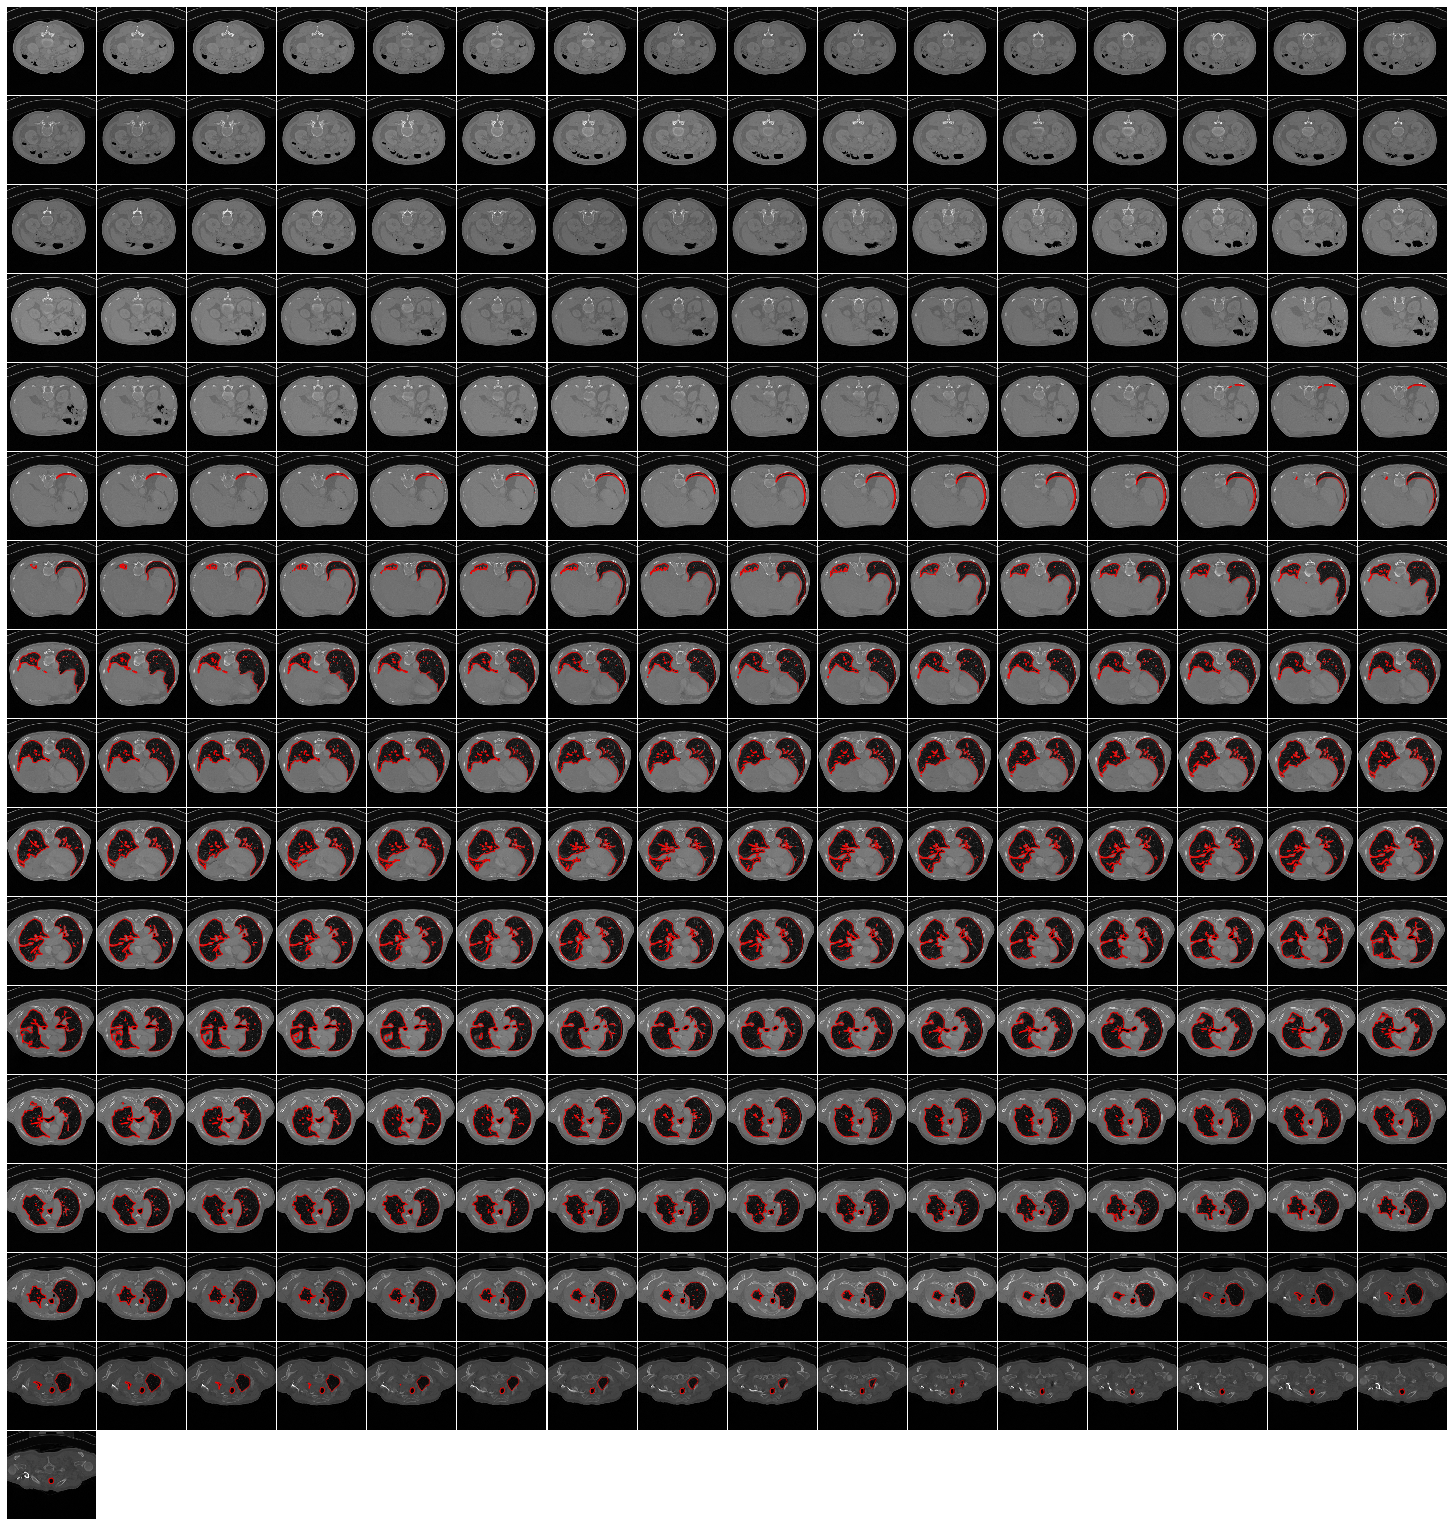

In [59]:
draw_masked(lola11_50, np.rot90(lola11_50_mask, k=2, axes=(1,2)), columns=16)